# SVD в компрессии изображений

In [ ]:
import numpy as np
from numpy.linalg import norm
from numpy.linalg import svd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
from ipywidgets import interact

In [ ]:
# image = mpimg.imread('python.jpg')
image = mpimg.imread('kzn.jpg')

img = np.array(image) # делает массив редактируемым

In [ ]:
print(f'img type:{type(img)}')
print(f'img size:{img.shape}')

img type:<class 'numpy.ndarray'>
img size:(932, 1080, 3)


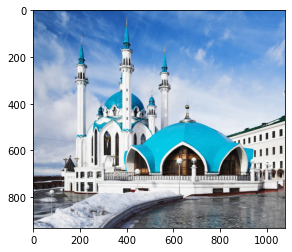

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
n_img = rgb2gray(img_as_float(img))
print(f'img type:{type(n_img)}')
print(f'img size:{n_img.shape}')

img type:<class 'numpy.ndarray'>
img size:(932, 1080)


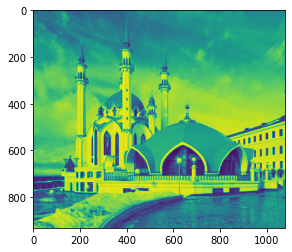

In [ ]:
plt.imshow(n_img)
plt.show()

In [ ]:
n_img

array([[0.37473961, 0.37473961, 0.37473961, ..., 0.49308   , 0.49308   ,
        0.49308   ],
       [0.37473961, 0.37081804, 0.37081804, ..., 0.48915843, 0.49308   ,
        0.49308   ],
       [0.37081804, 0.37081804, 0.36689647, ..., 0.48915843, 0.48915843,
        0.48915843],
       ...,
       [0.81465255, 0.80820824, 0.8003651 , ..., 0.50644784, 0.47899686,
        0.46666667],
       [0.82641725, 0.82249569, 0.81605137, ..., 0.45938902, 0.45154588,
        0.42017333],
       [0.80680941, 0.80680941, 0.79644353, ..., 0.46891373, 0.41401176,
        0.43361961]])

##### Использование SVD для сжатия изображения:

In [ ]:
def compress_svd(image, k): # Параметр k задает степень сжатия
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix,s

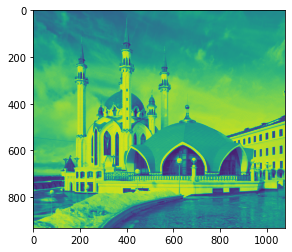

In [ ]:
img2, s = compress_svd(n_img,300)
plt.imshow(img2)
plt.show()

In [ ]:
def show_compressed_img(k): # 
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=n_img
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    axes[0].plot(s)
    compression_ratio =100.0* k/original_shape[0]
    axes[1].set_title("Уровень сжатия={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img, cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [ ]:
interact(show_compressed_img,k=(1,932));

interactive(children=(IntSlider(value=466, description='k', max=932, min=1), Output()), _dom_classes=('widget-…

In [ ]:
image.shape

(932, 1080, 3)